## Vector de shakespeare

In [2]:
from sys import path
from os.path import join, abspath

# Tell python to search for the files and modules starting from the working directory
module_path = abspath(join('..'))
if module_path not in path:
    path.append(module_path)

In [4]:
import numpy as np

from qubit_approximant import *
from qubit_approximant.benchmarking.functions import gaussian

x = np.linspace(-2.5, 2.5, 1000)
fn_kwargs = {"std": 0.5, "coef": 1}
fn = gaussian(x, **fn_kwargs)


circuit = CircuitRxRyRz(x, encoding="prob")
cost = Cost(fn, circuit, metric="mse")
optimizer = BlackBoxOptimizer(method="L-BFGS-B")

layers = 6
init_params = np.random.randn(4 * layers)
opt_params = optimizer(cost, cost.grad, init_params)

fn_approx = circuit.encoding(opt_params)

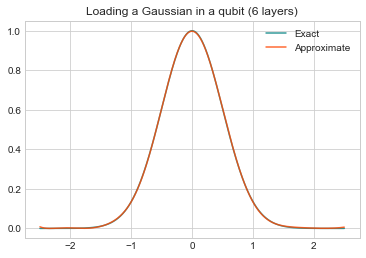

In [41]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
style.use(['seaborn-whitegrid'])

plt.plot(x, fn, alpha=0.8, c="teal", label="Exact")
plt.plot(x, fn_approx, alpha=0.8, c="orangered", label="Approximate")
plt.title("Loading a Gaussian in a qubit (6 layers)")
plt.legend()
plt.savefig("gaussian.png", dpi=800)

In [4]:
from sys import path
from os.path import join, abspath

# Tell python to search for the files and modules starting from the working directory
module_path = abspath(join('..'))
if module_path not in path:
    path.append(module_path)

import numpy as np
import qubit_approximant as qa
from qubit_approximant.benchmarking.functions import gaussian

x = np.linspace(-2.5, 2.5, 1000)
fn = gaussian(x, std=0.5, coef=1)
min_layers = 2
max_layers = 10

params = 0.3 * np.random.randn(4 * min_layers)
circuit = qa.CircuitRxRyRz(x, encoding="prob")
cost = qa.Cost(fn, circuit, metric="mse")
opt = qa.BlackBoxOptimizer(method="L-BFGS-B")
layerwise_opt = qa.LayerwiseOptimizer(opt, min_layers, max_layers, new_layer_coef=0.3, new_layer_position="initial")
params_list = layerwise_opt(cost, cost.grad, params)

l1_list, l2_list, inf_list, infidelity_list = qa.metric_results(
    circuit = circuit,
    fn = gaussian,
    fn_kwargs = {"std": 0.5, "coef": 1},
    params_list = params_list)

In [8]:
import numpy as np

from qubit_approximant.benchmarking.functions import gaussian
from qubit_approximant.core import CircuitRxRyRz, Cost, BlackBoxOptimizer, LayerwiseOptimizer
from qubit_approximant.benchmarking import metric_results

x = np.linspace(-2.5, 2.5, 1000)
fn_kwargs = {'mean': 0.0, 'std': 0.5, 'coef': 1}
fn = gaussian(x, **fn_kwargs)

circuit = CircuitRxRyRz(x, encoding='prob')
cost = Cost(fn, circuit, metric='mse')
optimizer = BlackBoxOptimizer(method="L-BFGS-B")

min_layer = 3
init_params = np.random.randn(4 * min_layer)
layerwise_opt = LayerwiseOptimizer(
    optimizer,
    min_layer=min_layer,
    max_layer=7,
    new_layer_coef=0.3,
    new_layer_position='random'
    )
params_list = layerwise_opt(cost, cost.grad, init_params)

l1_list, l2_list, inf_list, infidelity_list = metric_results(
    fn = gaussian,
    fn_kwargs = {'mean': 0.0, 'std': 0.5, 'coef': 1},
    circuit=circuit,
    params_list=params_list
    )